# Regression - Geçmiş verilerden geleceği tahmin etme / Rakam tahmin etme

In [22]:
#Bugün Regression algoritmalarını detaylı bir şekilde göreceğiz

In [23]:
pip install xlrd #excel dosyasını çalıştırmak için

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd

In [25]:
df=pd.read_excel('cars.xls')

In [26]:
#EDA - exploratory data analysis

In [27]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [28]:
df.shape

(804, 12)

In [29]:
df.sample()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
742,23274.480711,21616,SAAB,9-2X AWD,Linear Wagon 4D,Wagon,4,2.5,4,1,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [31]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [32]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [33]:
import seaborn as sns

<Axes: >

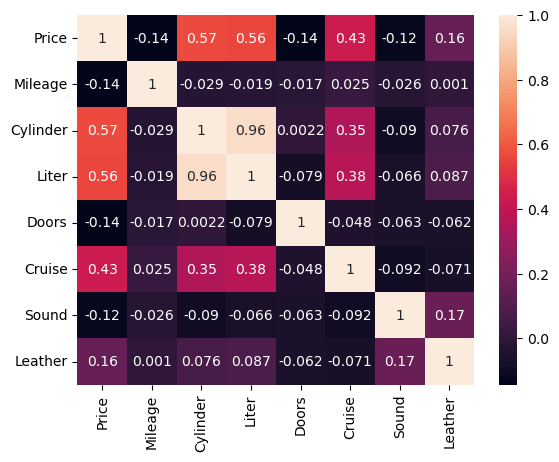

In [34]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [35]:
#outlier formulu +-3 * standart sapma

In [36]:
df['Price'].mean(),df['Price'].median(),df['Price'].min(),df['Price'].max(),df['Price'].std()

(21343.143767325837,
 18024.995019071903,
 8638.930895260657,
 70755.46671654288,
 9884.852800898007)

In [37]:
df.sample(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
504,22004.930438,15516,Pontiac,Bonneville,SLE Sedan 4D,Sedan,6,3.8,4,1,1,1
728,27703.203995,24738,SAAB,9_5 HO,Aero Sedan 4D,Sedan,4,2.3,4,1,1,1
43,17944.856923,19592,Buick,Lesabre,Custom Sedan 4D,Sedan,6,3.8,4,1,0,0
752,13991.040057,21020,Saturn,Ion,Quad Coupe 2D,Coupe,4,2.2,2,0,1,0
92,31431.130370,11013,Cadillac,CTS,Sedan 4D,Sedan,6,2.8,4,1,1,1


In [38]:
dummy_df = pd.get_dummies(df, drop_first=True)

In [43]:
df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [42]:
dummy_df.sample(5)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
80,51154.047216,2202,8,5.7,4,1,1,1,True,False,...,False,False,False,True,False,False,False,False,True,False
624,17214.325078,12610,4,1.8,4,1,1,1,False,False,...,False,False,False,False,False,True,False,False,False,True
93,30781.515633,14937,6,2.8,4,1,1,1,True,False,...,False,False,False,True,False,False,False,False,True,False
510,21903.322618,4537,6,3.5,4,1,1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
237,12319.696246,24568,4,2.2,2,1,1,1,False,True,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df['Make'].unique() #tekil veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [ ]:
df['Make'].nunique() #kac tane tekil arba var

6

In [ ]:
df['Make'].value_counts() #hangi marka arabadan kac tane var ve büyükten küçüğe sırala

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [ ]:
df['Make'].value_counts(normalize=True) #Yüzdesel dağılımını söyler

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

[Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '320'),
 Text(0, 0, '150'),
 Text(0, 0, '114'),
 Text(0, 0, '60')]

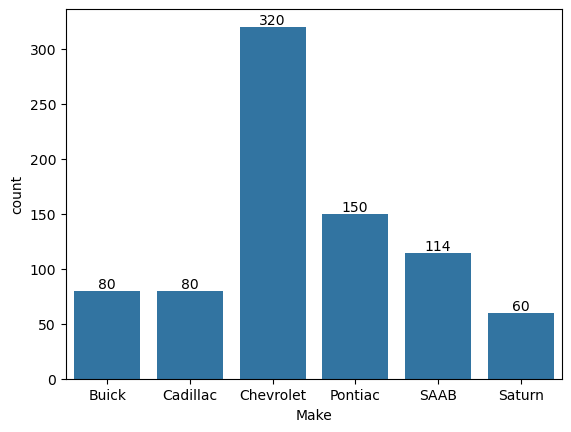

In [ ]:
ax = sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0])

<Axes: xlabel='Cylinder', ylabel='count'>

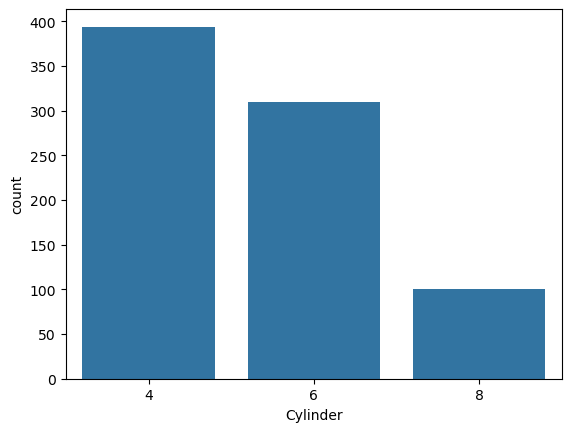

In [ ]:
sns.countplot(x=df['Cylinder'])

<Axes: xlabel='count', ylabel='Doors'>

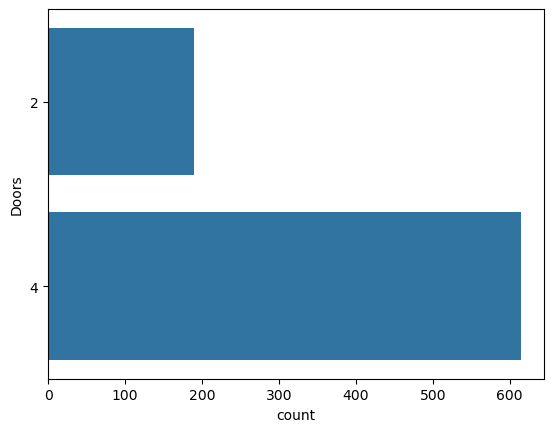

In [ ]:
sns.countplot(y=df['Doors'])

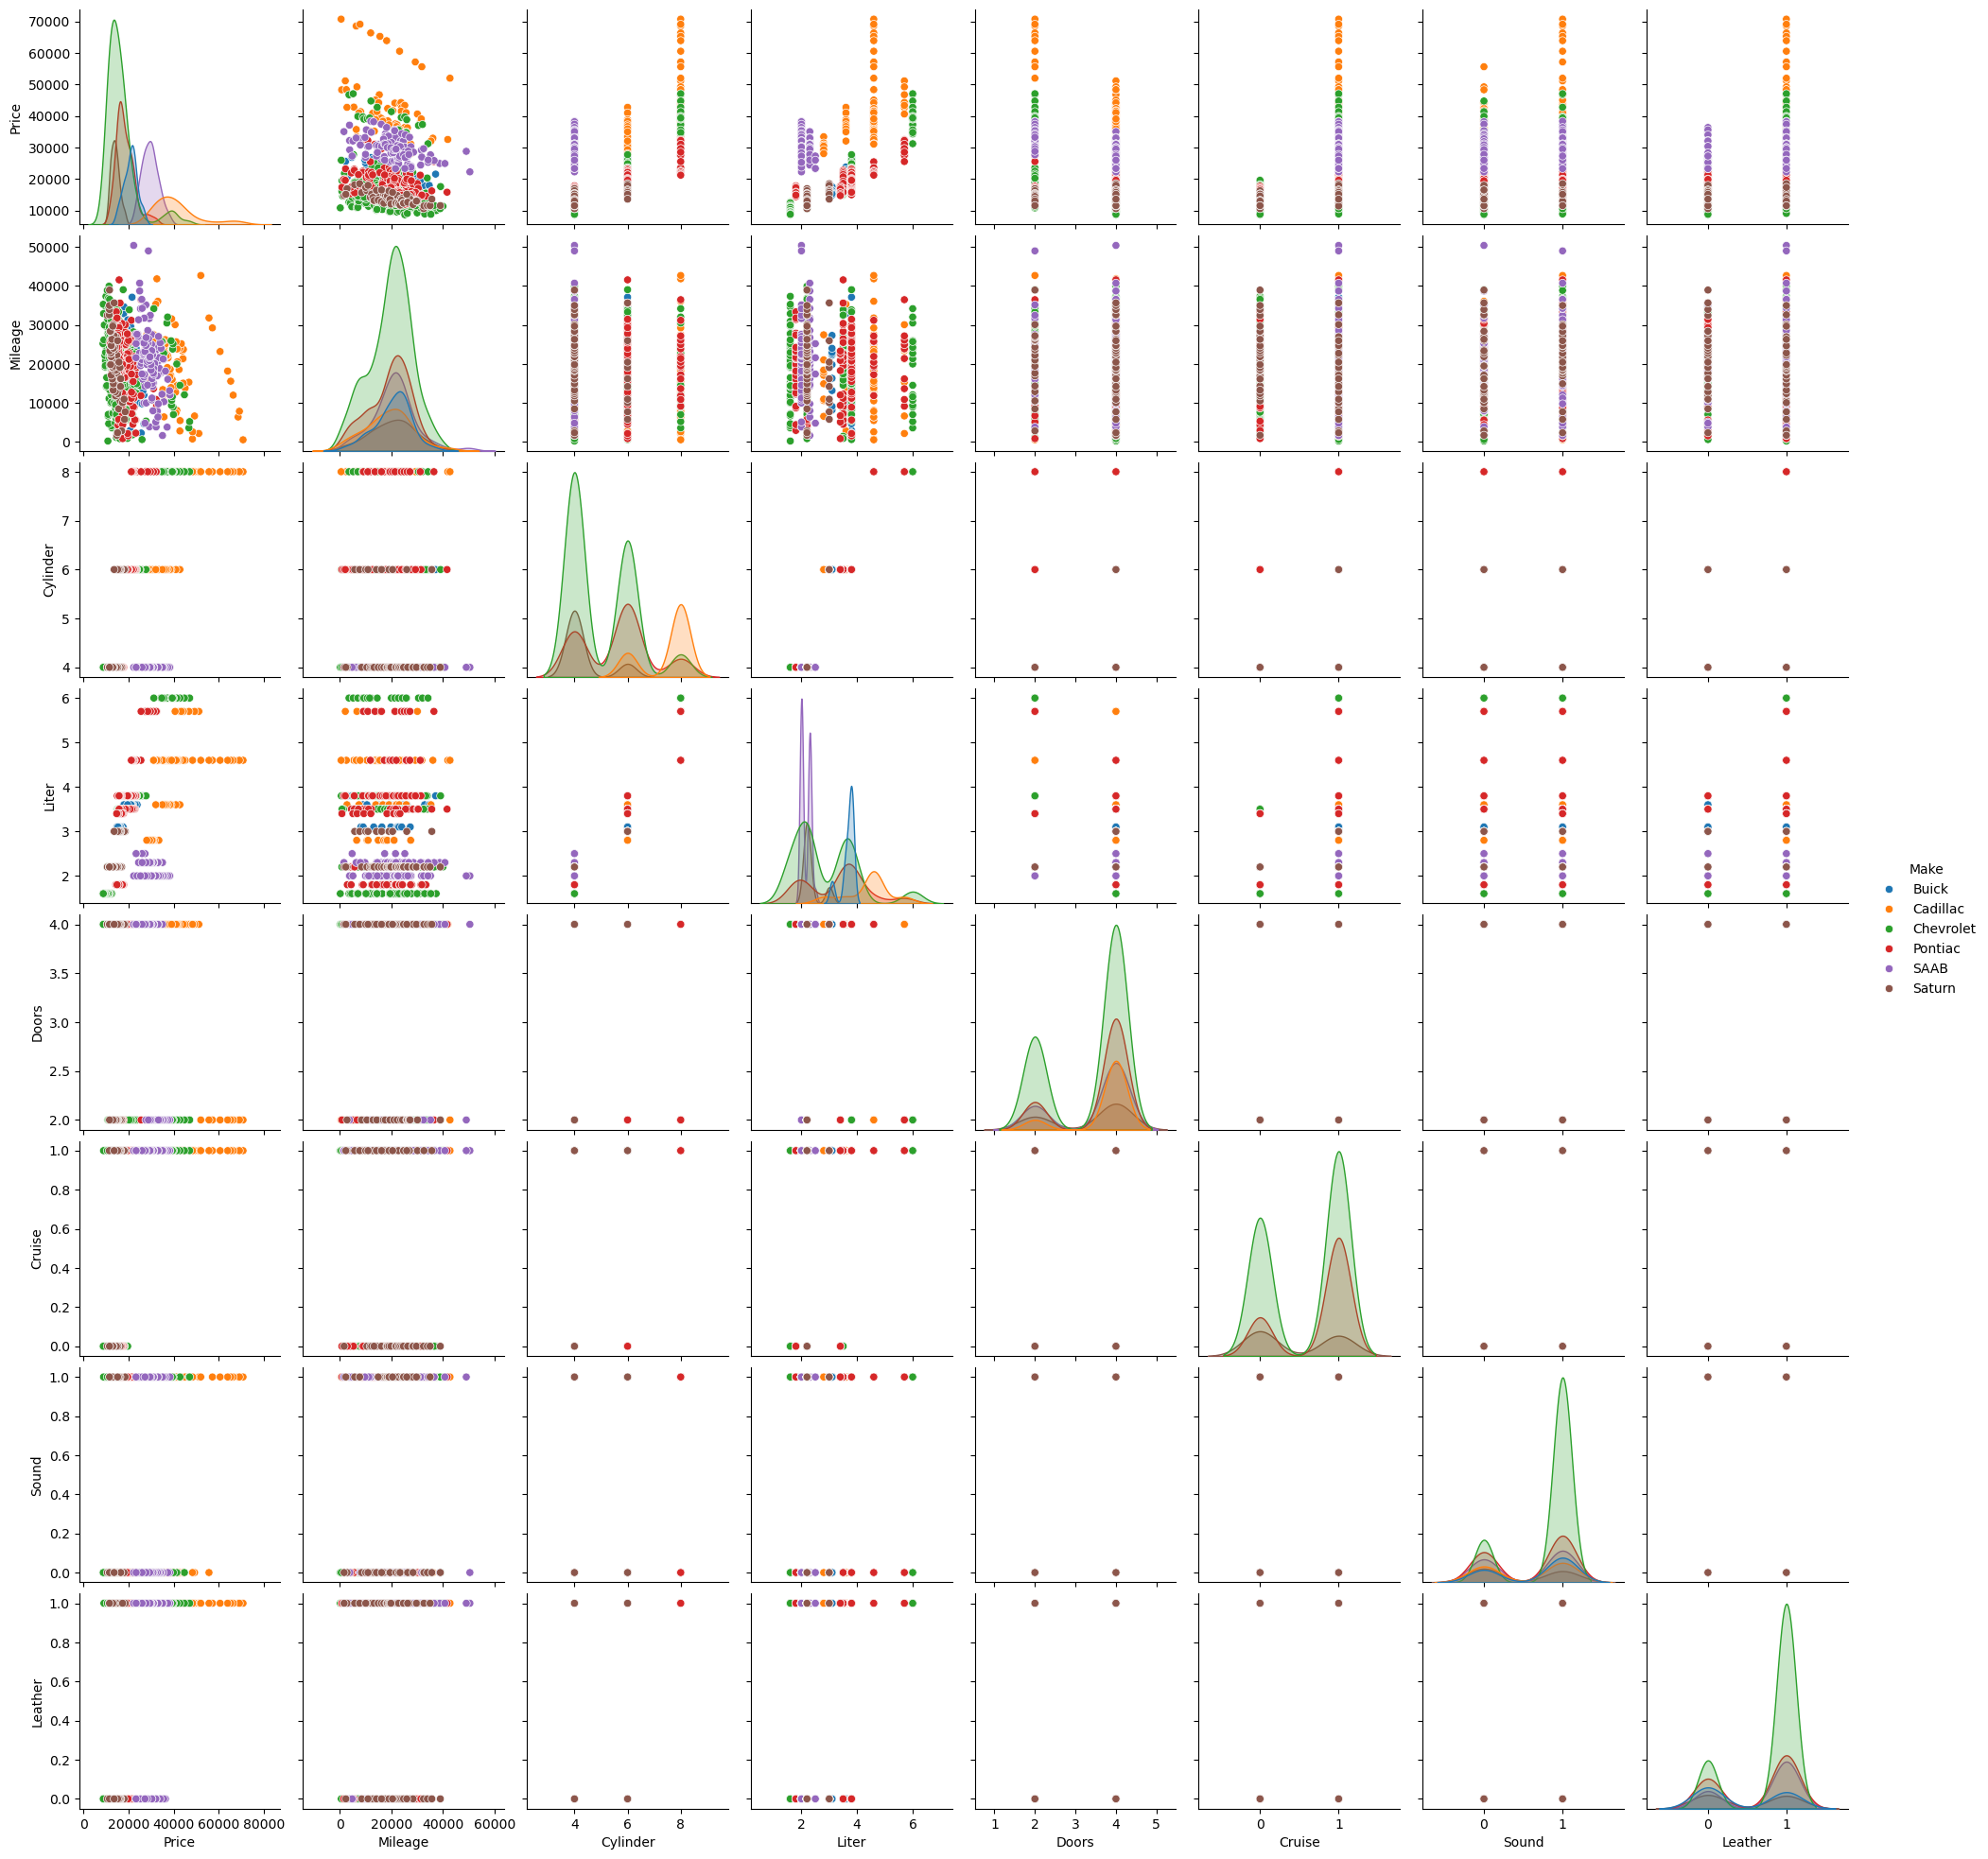

In [ ]:
sns.pairplot(df,hue='Make')

<Axes: xlabel='Price', ylabel='Mileage'>

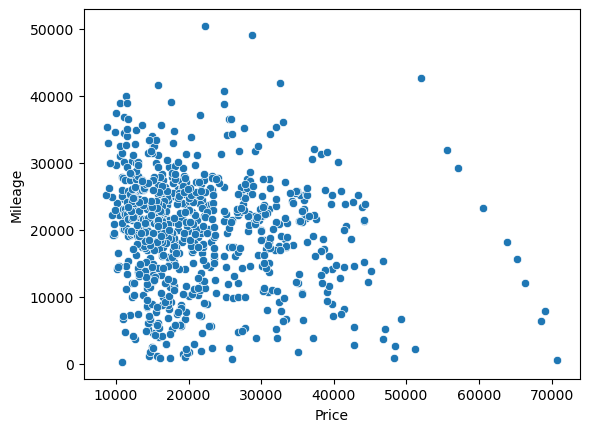

In [ ]:
sns.scatterplot(x='Price',y='Mileage', data=df)

<Axes: xlabel='Price', ylabel='Mileage'>

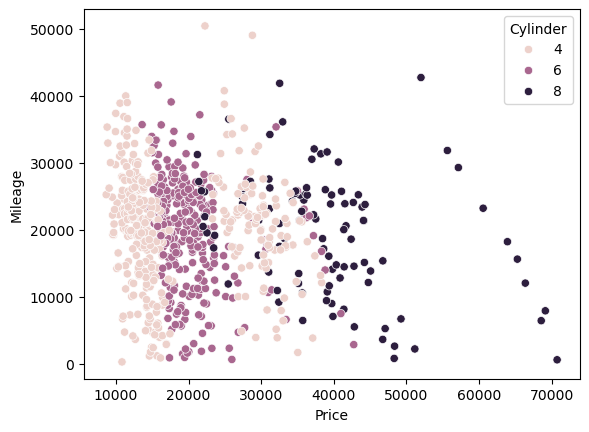

In [ ]:
sns.scatterplot(x='Price', y='Mileage', hue='Cylinder', data=df)

<Axes: xlabel='Price', ylabel='Mileage'>

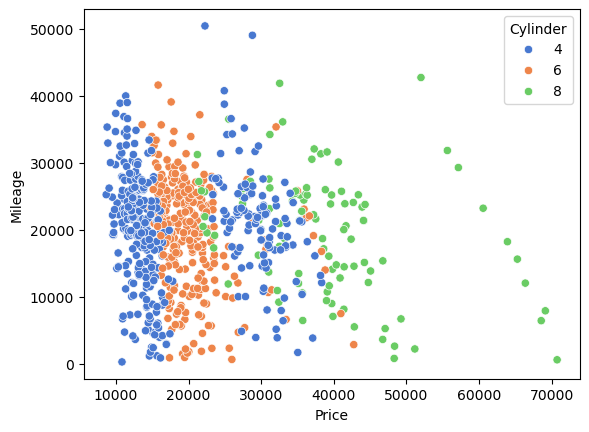

In [ ]:
sns.scatterplot(x='Price', y='Mileage', hue='Cylinder', palette='muted', data=df)  #palette renk paketi

# P - -Değeri hesaplama

In [ ]:
#Ho= arabanın fiyatı üzerindeki km arasında bir bağ yok
#Ha arabanın faiytı üzerinde km arasında bir bağ var
#p değerinde bakıyoruz eğer p<0.05 H0 reddet Alternatifi kabul et

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
_,p=ttest_ind(df['Price'],df['Mileage'])
p

0.0008662338227446262

In [ ]:
# Sonuc p=0.0008662338227446262 <0.05 sıfır hipotezini reddedtip alternatifini kabul ediyor

<Axes: xlabel='Price', ylabel='Count'>

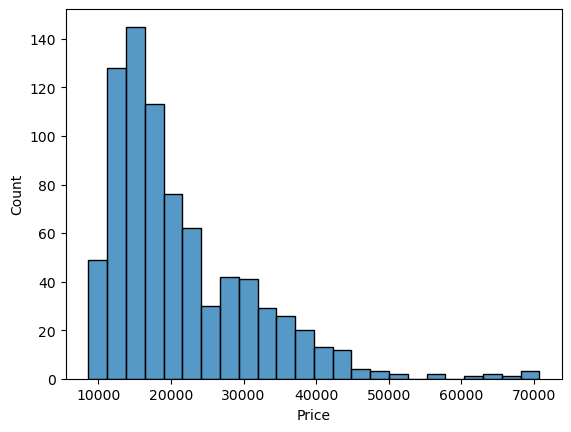

In [ ]:
sns.histplot(x=df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

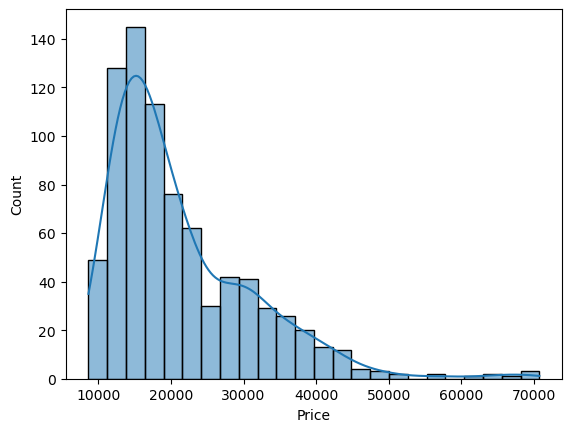

In [ ]:
sns.histplot(x=df['Price'],kde=True)

<Axes: xlabel='Price', ylabel='Count'>

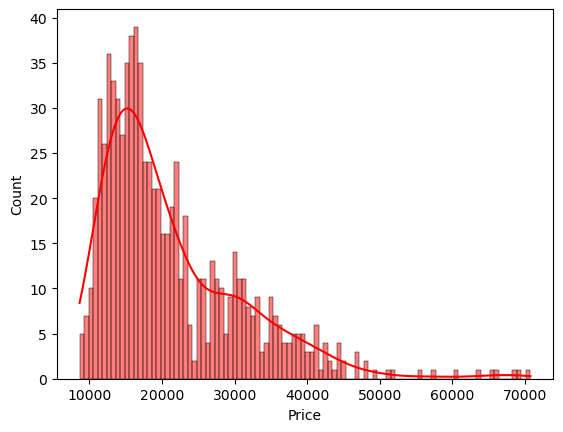

In [ ]:
sns.histplot(x=df['Price'],kde=True, color='red', bins=100)

<Axes: xlabel='Price', ylabel='Density'>

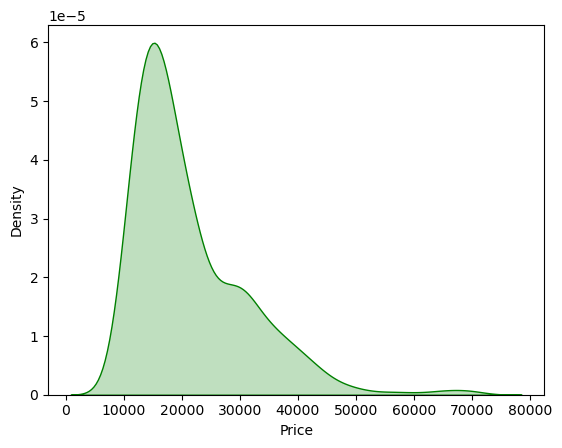

In [ ]:
sns.kdeplot(x=df['Price'], fill=True, color='Green')

<Axes: xlabel='Price'>

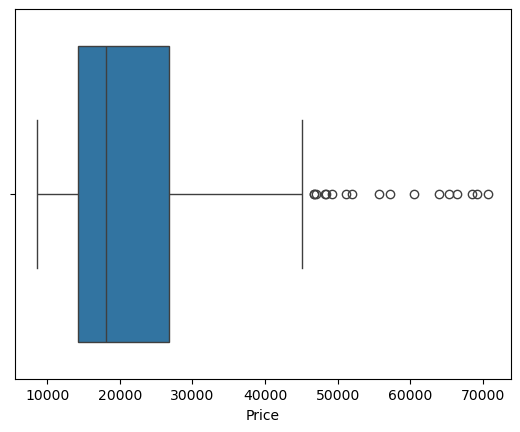

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: >

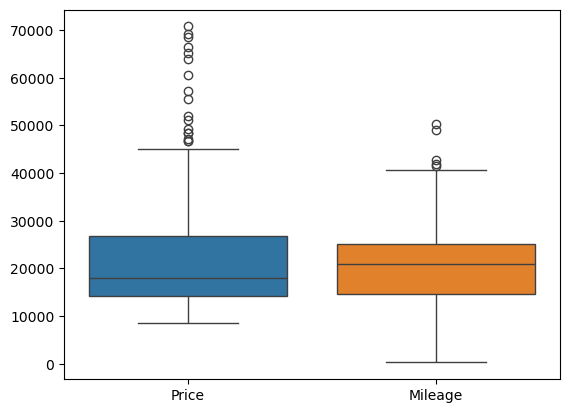

In [ ]:
sns.boxplot([df['Price'],df['Mileage']])

<Axes: xlabel='Make', ylabel='Price'>

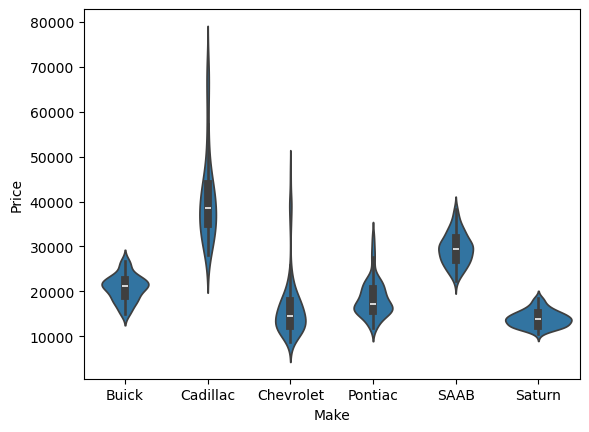

In [ ]:
sns.violinplot(x='Make', y='Price', data=df)

<Axes: xlabel='Make', ylabel='Price'>

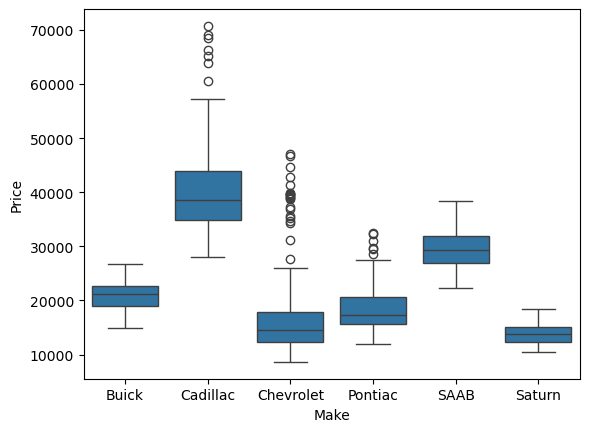

In [ ]:
sns.boxplot(x='Make', y='Price', data=df)

In [ ]:
import  plotly.express as px

In [ ]:
px.bar(df,x='Make', y='Price', color='Make')

In [ ]:
px.scatter_3d(df,x='Mileage',y='Price', z='Cylinder', color='Make')

In [ ]:
#Data Science #MLOps

In [ ]:
px.sunburst(df,path=['Make','Model','Trim'], values='Price')

# Feature Engineering

In [ ]:
df.corr(numeric_only=True)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [ ]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [ ]:
x=df[['Cylinder','Liter','Cruise','Cruise']]
y=df[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train.shape, x_test.shape

((643, 4), (161, 4))

# Modedlling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train) #makine öğrenmesi

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
mean_squared_error(y_test,tahmin)**.5

7533.386464534652

In [ ]:
r2_score(y_test,tahmin)

0.2844732363138288

In [ ]:
# Label Encoding

In [ ]:
x=df[['Cylinder','Liter','Cruise','Cruise','Trim']]
y=df[['Price']]

In [ ]:
x.head()

,Cylinder,Liter,Cruise,Cruise,Trim
0,6,3.1,1,1,Sedan 4D
1,6,3.1,1,1,Sedan 4D
2,6,3.1,1,1,Sedan 4D
3,6,3.1,1,1,Sedan 4D
4,6,3.1,1,1,Sedan 4D


In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
x.head()

,Cylinder,Liter,Cruise,Cruise,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,Trim_Aero Wagon 4D,Trim_Arc Conv 2D,Trim_Arc Sedan 4D,Trim_Arc Wagon 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,6,3.1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,3.1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,6,3.1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,6,3.1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,6,3.1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin)**.5 #Roor Mean Squared Error Hata

3532.284038148488

In [ ]:
r2_score(y_test,tahmin)

0.842689893303699

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [ ]:
Rmodel=R.fit(x_train,y_train)

In [ ]:
tahmin2=Rmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin2)**.5

3577.471448564727

In [ ]:
r2_score(y_test,tahmin2)

0.8386393105738426

In [ ]:
Lmodel=L.fit(x_train,y_train)

In [ ]:
tahmin3=Lmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin3)**.5

3530.4211217887723

In [ ]:
r2_score(y_test,tahmin3)

0.8428557793365432

In [ ]:
#Coefficients - Katsayılar

In [ ]:
lr.coef_

array([[ 5.96133837e+03, -8.86836625e+02, -5.67040526e+16,
         5.67040526e+16,  1.67291082e+04,  1.14028964e+04,
         1.36207901e+04,  1.87524407e+04,  1.38235718e+04,
         1.51570000e+04, -6.81700000e+03, -4.30300000e+03,
        -4.04125000e+03,  5.63600000e+03, -3.10400000e+03,
        -7.39050000e+03,  2.88000000e+02,  7.56000000e+02,
        -1.01400000e+04, -7.62293750e+03, -2.76000000e+02,
        -5.57800000e+03, -1.48320000e+04,  2.56560000e+04,
        -1.03100000e+04, -4.58400000e+03, -4.95800000e+03,
        -9.09300000e+03, -4.89200000e+03, -2.00900000e+03,
        -1.74900000e+03, -5.55150000e+03, -4.91600000e+03,
        -8.38700000e+03, -5.28800000e+03, -5.17600000e+03,
         1.69380000e+04,  1.03662500e+04,  1.31460000e+04,
        -8.76200000e+03, -9.82000000e+02, -3.85000000e+03,
        -4.66650000e+03, -4.36700000e+03, -2.71800000e+03,
        -5.70400000e+03, -7.11550000e+03, -2.10900000e+03,
        -5.23250000e+02,  7.30000000e+01]])

In [ ]:
feature_importance=pd.DataFrame({'Feature' :x_train.columns,'Coefs':lr.coef_[0]})

In [ ]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

In [ ]:
feature_importance.head()

,Feature,Coefs
3,Cruise,5.670405e+16
23,Trim_Hardtop Conv 2D,2.565600e+04
7,Trim_Arc Conv 2D,1.875244e+04
36,Trim_Linear Conv 2D,1.693800e+04
4,Trim_Aero Conv 2D,1.672911e+04


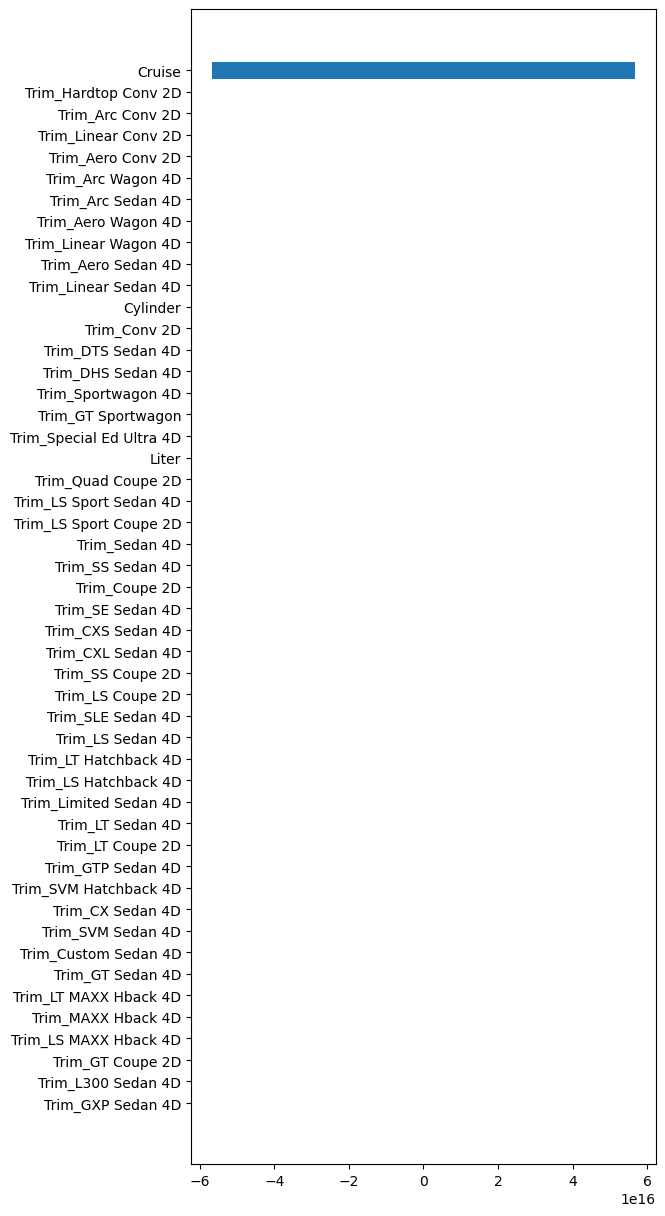

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [ ]:
#Regression da başarı oranı için bilmek gerekenler
#1-r2_score >0.85
#2-Düşük RMSE
#3-Residuals should follow normal distributions

In [ ]:
residuals=y_test-tahmin

<Axes: ylabel='Count'>

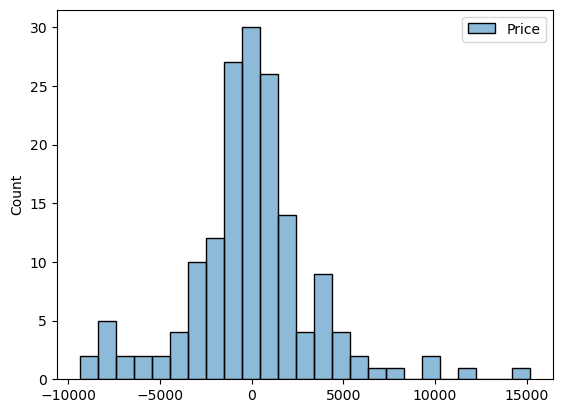

In [ ]:
sns.histplot(residuals)

<Axes: xlabel='Price', ylabel='Density'>

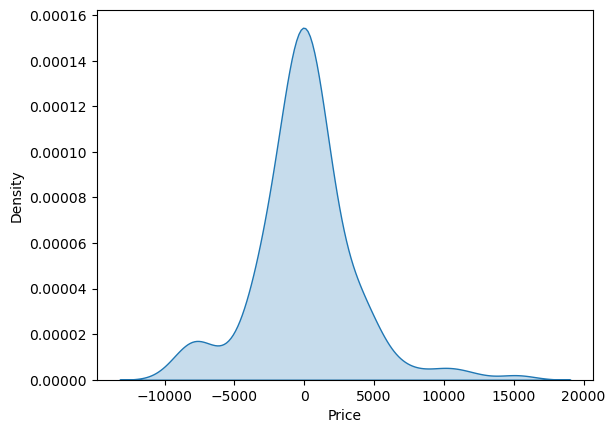

In [ ]:
sns.kdeplot(x=residuals['Price'],fill=True)